<a href="https://colab.research.google.com/github/kenrp8/Ejemplo/blob/main/Ejemplo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ejemplo
## Muestra de uso de google colab
Kenyi Josué Ramíírez Palacios

Para poder realizar laintegración necesitas:

* Previamente debes tener una cuenta de github para porder subir el código a un repositorio.

* Tener una cuenta en google colab.

__Este es un cuadro de Texto__ , puedes dar doble click sobre el para ver el cóódigo. Para añadir un cuadro de texto es necesario oprimir la opción +Texto 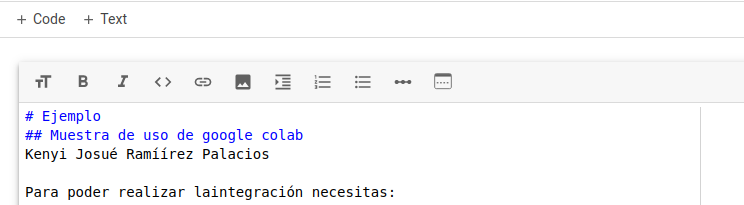


Vamos a añadir usa celda de código

In [4]:
#importamos librerías

import numpy as np
import pandas as pd
from sklearn import preprocessing


In [16]:
# Esta es una celda de código. Estáá basada en un proyecto previo. La utilidad read_htm de panda permite obtener todas las
#tablas en una página, siempre que estas no se encuentren en un iframe.

# Now we are interested in get the Cities Table from Wikipedia

url = 'https://en.wikipedia.org/wiki/List_of_cities_in_Mexico'

#Read the html tables
table_MXN = pd.read_html(url)

#Select Cities table
city_data = table_MXN[1]

#Normalize Census information
aux = city_data[['2020 Census']].values.astype(float)
min_max_scaler = preprocessing.MinMaxScaler()
aux_scaled = min_max_scaler.fit_transform(aux)

city_data['2020 Census'] = aux_scaled

city_data.drop(city_data.columns.difference(['City', 'State' ,'2020 Census']), axis=1, inplace=True)


In [17]:
city_data.head(12)

,City,State,2020 Census
0,Mexico City,Mexico City,1.000000
1,Tijuana,Baja California,0.183569
2,Ecatepec,State of Mexico,0.165140
3,León,Guanajuato,0.158098
4,Puebla,Puebla,0.153952
5,Ciudad Juárez,Chihuahua,0.149464
6,Guadalajara,Jalisco,0.136672
7,Zapopan,Jalisco,0.122541
8,Monterrey,Nuevo León,0.109896
9,Ciudad Nezahualcóyotl,State of Mexico,0.102142


Puedes correr cada celda usando el símbolo de play al lado de esta o en la  opción runtime seleccionando _run all_.

Para integrar a github puedes ir a la opción file:
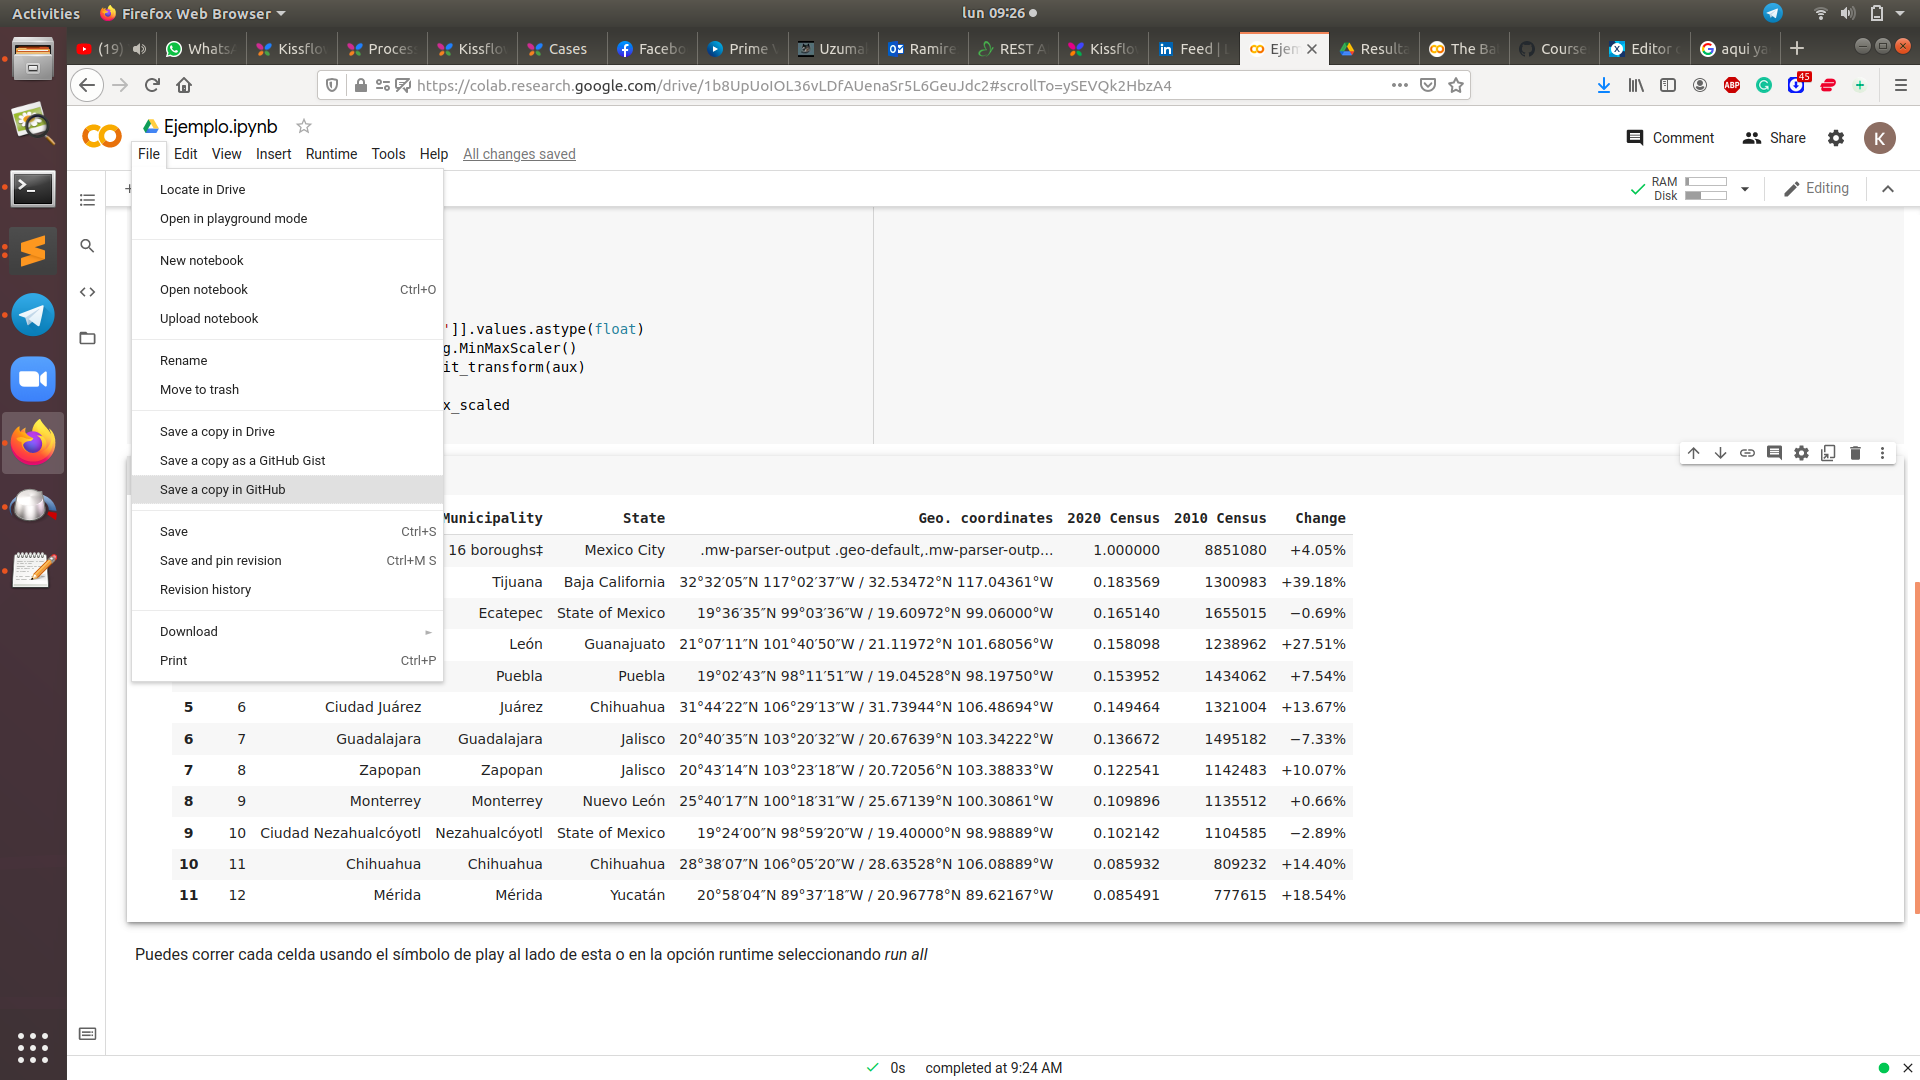

En caso de tener cuenta de github pero no haberla enlazado con google colab te va a pedir tu cuenta. Inserta la url de tu cuenta de github 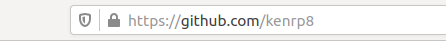

En _repository_ eliges el repositorio de destino (debe de existir en GitHub) 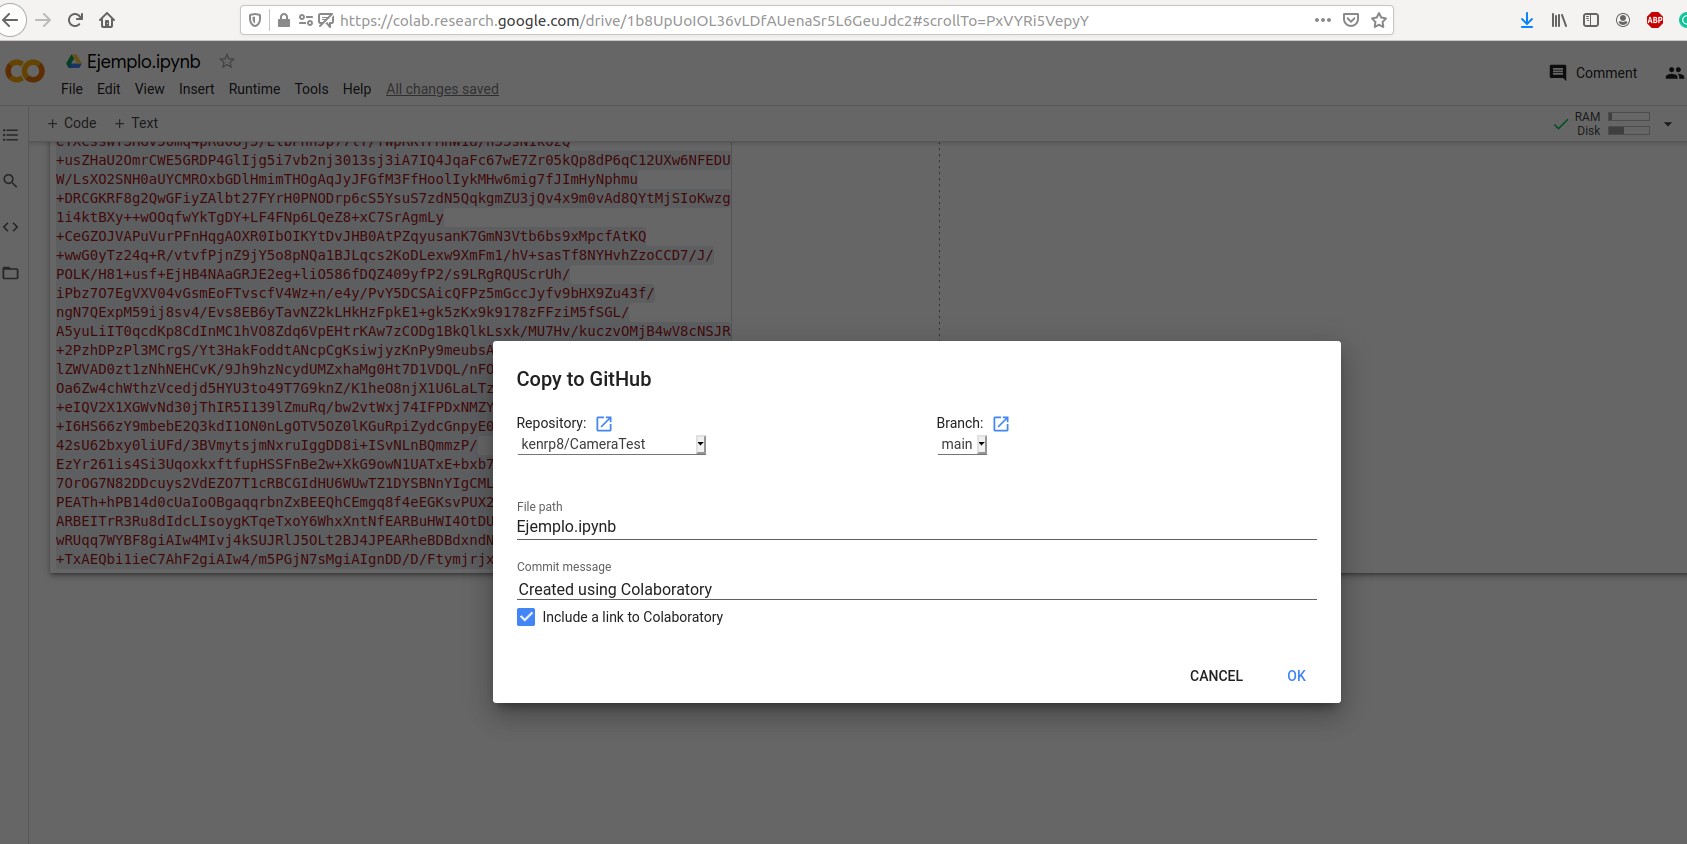

En branch eliges la rama de destino (más referencias https://www.youtube.com/watch?v=RGOj5yH7evk) la rama destino debe existir previamente, por defecto siempre existe __main__. En filepath elige la dirección del archivo, puede ser carpeta_1\carpeta_2\filename.ipynb

En commit message agrega un comentario.

Al oprimir OK te debe redireccionar a GitHub con una copia en la nube de tu notebook.

La ventaja es que puedes combinar texto y código, lo que lo hace simple de usar a la hora de generar un reporte o exponer el trabajo. Ademáás te permite usar librerías que en una mááquina ordinaria suelen ser difíciles de usar.

In [28]:
import folium
from geopy.geocoders import Nominatim
import matplotlib.cm as cm
import matplotlib.colors as colors



In [25]:
def locations(adress_array):
  latitude = []
  longitude = []
  geolocator = Nominatim(user_agent="can_explorer")
  for ads in adress_array: 
    location = geolocator.geocode(ads)
    latitude.append(location.latitude)
    longitude.append(location.longitude)

  return (latitude, longitude)

In [20]:
# City Adress
city_array = []
for c, C in zip(city_data['City'].values, city_data['State'].values):
  city_array.append(c + ', ' + C)

latitude_c, longitud_c = locations(city_array)

city_data['latitude'] = latitude_c
city_data['longitude'] = longitud_c

city_data.head()

,City,State,2020 Census,latitude,longitude
0,Mexico City,Mexico City,1.000000,19.432630,-99.133178
1,Tijuana,Baja California,0.183569,32.501019,-116.964663
2,Ecatepec,State of Mexico,0.165140,19.599408,-99.048728
3,León,Guanajuato,0.158098,21.121860,-101.682508
4,Puebla,Puebla,0.153952,19.043720,-98.198149


In [26]:
latitude = 23.634501
longitude = -102.552784

In [37]:
# create map
map_mx = folium.Map(location=[latitude, longitude], zoom_start=6)

#establece el sistema de colores
x = np.arange(city_data.shape[0])
ys = [i + x + (i*x)**2 for i in range(city_data.shape[0])]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, census, ind_color in zip(city_data['latitude'], city_data['longitude'],city_data['City'], city_data['2020 Census'], np.arange(city_data.shape[0])):
    label = folium.Popup(str(poi) + ' ' + str(census) + ' census proportion', parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[ind_color],
        fill=True,
        fill_color=rainbow[ind_color-1],
        fill_opacity=0.7).add_to(map_mx)

#imprime las ciudades en méxico   
map_mx

Puedes seleccionar los bullets en el mapa, al oprimirlos despliegan información. Esto ayuda a crear presentaciones interactivas así como crear dashboards.